# Overview

The following portfolio activity combines parts of the performance and knowledge evidence requirements for ICTDAT503 - Use unsupervised learning for clustering. The activity also combines crucial scaffolding and additional content not yet covered in the course.

You are given two sessions to complete the work.  

Complete all short answer questions and code tasks assigned. Background and supporting sections are clearly marked as such.

Portions of this portfolio task are based on Chapter 47, In Depth: k-Means Clustering, from Python Data Science Handbook by Jake VanderPlas. The chapter is available [here](https://learning.oreilly.com/library/view/python-data-science/9781098121211/ch47.html#ch_0511-k-means_introducing-k-means).

Additional sections are based on Chapter 19, Clustering, of the Machine Learning with Python Cookbook 2nd Edition, by Kyle Gallatin the chapter is available [here](https://learning.oreilly.com/library/view/machine-learning-with/9781098135713/ch19.html#id378)

The following topics are covered in this portfolio activity:

- Methodologies for clustering unlabelled data.
- Normalization and standardization techniques and their impact on clustering algorithms.
- Application of K-Means clustering to analyzing multiple data sets, including applying K-Means clustering to image data.
- Interpreting and evaluating the results of clustering algorithms.



In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
# if the selected style is not found, use plt.style.available to see what you have installed
import numpy as np

# generate some data
from sklearn.datasets import make_blobs

# Perform KMeans clustering
from sklearn.cluster import KMeans

## Activity: Fundamentals of Clustering

1. Examine the figure shown below (not the code used to generate it!). Give your best guess about the number of distinct clusters in the data.
> Answer here

2. How many clusters does each data point belong to?
> Answer here

3. How many dimensions are in the data?
> Answer here

4. In your own words, without reference to a specific mathematical formulation or clustering algorithm, describe how you would reason about (a) the number of clusters and (b) determining which cluster each data point belongs to.
> Answer here
>
>

5. Another way to think about clustering is as a form of unsupervised learning. What does this mean? Refer to `labels` in your answer.
> Answer here
>
> 



In [ ]:
X, y_true = make_blobs(n_samples=300, centers=4,
                               cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

> 💡 Did you notice the use of a capital `X`? Usually we use lowercase for variables, what gives? The capital `X` (and capitals more generally) is a common convention in machine learning to represent a matrix of data (i.e. more than one dimension). Usually it means what we have is an `input matrix`, sample data that we will use to train a model.  The `y`, typically lowercase, is used to represent the target or label vector. 
- **Vector** `y` is a one-dimensional array of numbers.
- **Matrix** `X` is an N-dimensional array of numbers.

The following code uses `KMeans` clustering to cluster the data set shown in the figure above and then plots the results. The code is based on the Python Data Science Handbook by Jake VanderPlas. 



In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);


## Activity: K-Means Clustering
Hopefully, the clustering shown above isn't too far off your best guess! The following question relate to the algorithm KMeans used to identify the clusters in the data and key terminology associated with clustering.
> 📝 You may need to do some research for this activity

1.  In this line of code `kmeans = KMeans(n_clusters=3)`, what does `n_clusters` represent? Include in your answer another letter of the alphabet that is commonly used in place of `n`.
> Answer here
> 

2. There are four black dots in the figure. What are these dots called and what do they represent?
> Answer here
>

3. Examine the code we used to generate the model:
    ```python
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    ```
    Each of the above line corresponds to a step (or steps) in the KMeans algorithm. Describe what each line does in the context of that algorithm. 
> Answer here
>
>

4. The `KMeans` class in `sklearn` has a method called `fit_predict`. How does this method differ from calling `fit` and `predict` separately?
> Answer here
>

5. The `KMeans` class constructor has a parameter called `init`. What does this parameter represent and what are the possible values it can take? In your answer reflect on why you might want to use a matrix-like initial value and what this value would represent?
> Answer here
>
> 

6. What assumptions does the KMeans algorithm make about the data? How might these assumptions impact the results of the algorithm?
> Answer here
>
> 


In [ ]:
inertias = []
K = range(1, 10)  # Examining from 1 to 20 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

## Applied K-Means clustering

In this section we will apply K-Means clustering to a famous data set that is often used in introductory Machine Learning texts. The digits data set is a collection of 8x8 pixel images of handwritten digits. Each image is a 64-dimensional vector, where each dimension represents the intensity of a pixel in the image. The data set consists of 1,797 images, each labeled with the digit it represents.

You might at first not see the connection between clustering and the digits data set. However, if you think of each image as a point in 64-dimensional space, the problem becomes clearer: we are given a set of points in 64-dimensional space, and we want to group them into clusters of similar points.

While other machine learning techniques are often used with this data set - we will use KMeans clustering to see if we can identify the digits without using the labels. In other words, we are going to figure out how to recognize different digits without even knowing what they are!

Because this is quite a famous data set, it is built in to Scikit-Learn, and we can easily load it by using the `datasets` module. The following code loads the digits data set and then applies KMeans clustering to the data. The code is based on the Python Data Science Handbook.



In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(digits.data)
y_kmeans = kmeans.predict(digits.data)

## Exercise
4. Given what you just learned about the data set, explain what the shape we determined above represents
> Answer here

#### Counting with our elbow

Let's suppose we knew nothing about digits (how many are there anyway?) and we wanted to use KMeans to figure out how many clusters we should use. One way to do this is to use the "elbow" method. The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

Use the elbow method to determine the optimal number of clusters (notice that you may need to alter the range that you try out)




In [ ]:
# Add code to plot the optimal number of clusters

### Elbow Method: Analysis

Notice that unlike in the synthetic example previously, the elbow method is not perfect. In the case of the digits data set, the elbow is not as clear as it is in other data sets. This is because the digits data set is quite complex and the digits are quite similar to each other. Nevertheless, even if we knew nothing about digits we could start to form an imperfect hypothesis about the number of digits in the data set.

1. What number of clusters would you choose based on the elbow method? Why?
> Answer here
>

2. Was this number the same or different than your intrinsic knowledge of the data set?
> Answer here
>

3. Provide a hypothesis as to why the number of digits and the number of clusters are not obviously the same
> Answer here

4. Should you use your intrinsic knowledge of the data set to determine the number of clusters? Why or why not?
> Answer here
>
>




### Performing the clustering

Try to perform the clustering based on the number of clusters you found. If you are struggling, try to use the code provided in the [Python Data Science Handbook](https://learning.oreilly.com/library/view/python-data-science/9781098121211/ch47.html#ch_0511-k-means_introducing-k-means) 

In [ ]:
# insert code here

In the above book, there is a section of code that plots the cluster centers. Here it is reproduced below:
    
    ```python
    fig, ax = plt.subplots(2, 5, figsize=(8, 3))
         centers = kmeans.cluster_centers_.reshape(10, 8, 8)
         for axi, center in zip(ax.flat, centers):
             axi.set(xticks=[], yticks=[])
             axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary
    ```
    https://learning.oreilly.com/library/view/python-data-science/9781098121211/ch47.html#ch_0511-k-means_introducing-k-means

1. Reproduce this code below and explain what it does:
> Answer here
> 
>

2. Which digit was the most difficult for you to recognize? What does this tell you about that particular digit?

> Answer here
>
> 

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
     axi.set(xticks=[], yticks=[])
     axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Interpreting the labels

Given what you see in the previous representation, you should be able to have a pretty good guess about how to interpret each cluster. 

Confusingly, when you look at the clusters, they are themselves labelled with  digits.

For example, let's look at the 3rd centroid (i.e. the one that is associated with all points labelled as 2):


In [ ]:
third_centroid = centers[3]
plt.figure(figsize=(3, 3))
plt.imshow(third_centroid, interpolation='nearest', cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("3rd Centroid")
plt.show()

That is, the points labeled with a `2` should be interpreted as a 6. Obviously it would be nice to assign the true label to these points.

In [ ]:
index = 0 # used to set a starting value for the loop. Do not change this line
target_label = 4 # This will search for the first image with a given model assigned to it. Change this value to see other images

In [ ]:
# re-run this cell to go to the next value labeled with `2`
j = index + 1
labels = kmeans.labels_
index = next(i for i, label in enumerate(labels[j:], j) if label == target_label)

In [ ]:
# display value matching the index label above
# run this cell each time after running the cell above
arbitrary_point = digits.data[index].reshape(8, 8)

plt.figure(figsize=(3,3))
plt.imshow(arbitrary_point, interpolation='nearest', cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title(f"Next point labeled with {target_label} (is a {digits.target[index]})")
plt.show()

3. Which digit was labeled with a '4' by our model. Leave the picture of this digit above?
> Answer here

Remember though that the original `digits` data set is pre-labelled so any time we want we can "cheat" and check how well our model did in identifying the digits (this is the digits.target `np.array`). So while `kmeans.labels_` (notice the underscore) gives us the arbitrary labels that KMeans assigned to the data, we can use the true labels (targets) to assign the correct label to each cluster, automatically. This method will work so long as our clusters were successful enough such that the plurality of the points in each cluster are the same as the target digit.

For example, we can check what the most common 'true' label is for the points in the cluster labelled as 2, and we'll find that it is 6. We can then assign this label to all points in the cluster meaning that when our model assigned 2 to the point, we can say it was identifying a '2' the majority of the time. Hence, we can use the true labels to assign the correct label to each cluster. 

In [ ]:
from scipy.stats import mode # statistical function for most frequent value
from sklearn.metrics import accuracy_score

labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    labels[mask] = mode(digits.target[mask])[0]


Now that we have the labels our model assigned to the data corresponding to our interpretation of those labels, coupled with the true labels, we can calculate the accuracy of our model. Above, we imported  the `accuracy_score` function from `sklearn.metrics`. This function takes two arguments: the true labels and the labels assigned by our model. It then returns the accuracy of our model. That is the proportion of points that were correctly assigned to the correct cluster. 

Pretty easy to understand. 

So for example, suppose we had four points that our model identified as a "6" and the true labels were `[6, 6, 6, 2]`. The accuracy would be 0.75 or 75% because three of the four points were identified correctly.

In [ ]:
accuracy_score(digits.target, labels)

1. Q. Provide a plain English explanation of the accuracy score you received above:
> Answer here

2. Q. Using the result above, can you determine how accurately the model identifies sixes? Why/why not? 
> Answer here
>
>

3. Q. Related to the above question, what assumption must be true for you to be able to determine how accurately the model identifies a specific digit using just the accuracy score aboev?
> Answer here
> 

4.  Q. Provided that the assumption above is true, can you tell what the chances are of the model identifying a 6 correctly? What about whether it is more likely for the model to misidentify say a 2 for 6 versus  versus misidentifying a 6 for a 2?
> Answer here
>
> 



### Confused?
A confusion matrix is a table that is often used to express the accuracy of a classification model on a set of data where the true labels are known. Unlike the accuracy score, the confusion matrix is able to determine accuracy for specific classifications for any value of `k`. Unlike the accuracy score, it can also distinguish between false positives and false negatives.

Here's how we can produce a confusion matrix for our model:



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, labels)

While this matrix can be used to interpret the accuracy of each classification by our model compared to the true labels, we can present it in a way that can make interpretation much easier (and more visually appealing). We can use the `heatmap` function from the `seaborn` library to do this. The following code will produce a heatmap of the confusion matrix (from the Python Data Science Handbook):


In [ ]:
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

The diagonal of the matrix represents the true positives (i.e. the number of times the model correctly identified the digit). The off-diagonal elements represent the false positives (i.e. the number of times the model incorrectly identified the digit). 

Using the chart you generated, answer the following questions:

1. Q. Which digit is most likely to be misclassified as a different digit (false negative)? Explain.
> Answer here
> 

2. Which digit(s) is most likely to be classified correctly?
> Answer here
>

3. Q. Which digit is most likely to offer false positives? Explain.
> Answer here
> 

4. If the model classifies a particular value as a 9, what is the probability that it is correct? Include your reasoning/calculations in your answer.
> Answer here
> 

5. Given the fact that the model *incorrectly* classified a particular value as a 9, what is the most likely true value of that digit? Include your reasoning/calculations in your answer.
> Answer here
>
> 

### Recommended activity

This activity is not required but provides key enrichment to your understanding of clustering. Complete **Example 2: k-Means for Color Compression** in the [Python Data Science Handbook](https://learning.oreilly.com/library/view/python-data-science/9781098121211/ch47.html#ch_0511-k-means_example-1-k-means-on-digits). This example demonstrates how KMeans can be used to compress an image by reducing the number of colors used. This is a great example of how clustering can be used in image processing.

## Evaluating model performance on unlabeled data

The confusion matrix we used provided detailed insights into the accuracy of our model but it relied on the true labels of the data. This is not always available in real-world scenarios. 

Consider that one of the **strengths** of unsupervised learning is that it can be used on data where the true labels are not known. So while having some targets against which to predict the effectiveness of our clusters is always good, it is just not always possible.

Is there any information we can use to predict how likely our model is to be accurate in the absence of true labels?

If we can visualize a cluster (i.e. if it has 3 dimensions or less) we can sometimes develop intuitions about its accuracy.

#### Task: Model Evaluation - Intuition
1. Consider, for example, the two sets of clusters below, write your best explanation on which you think is more likely to provide real-world meaningful clusters and your justification, use common sense and reasoning in your answer, and include at least two properties of the data that you think are important in determining the validity of the clusters:
> Answer here
>
> 


Text(0.5, 1.0, 'Example 2')

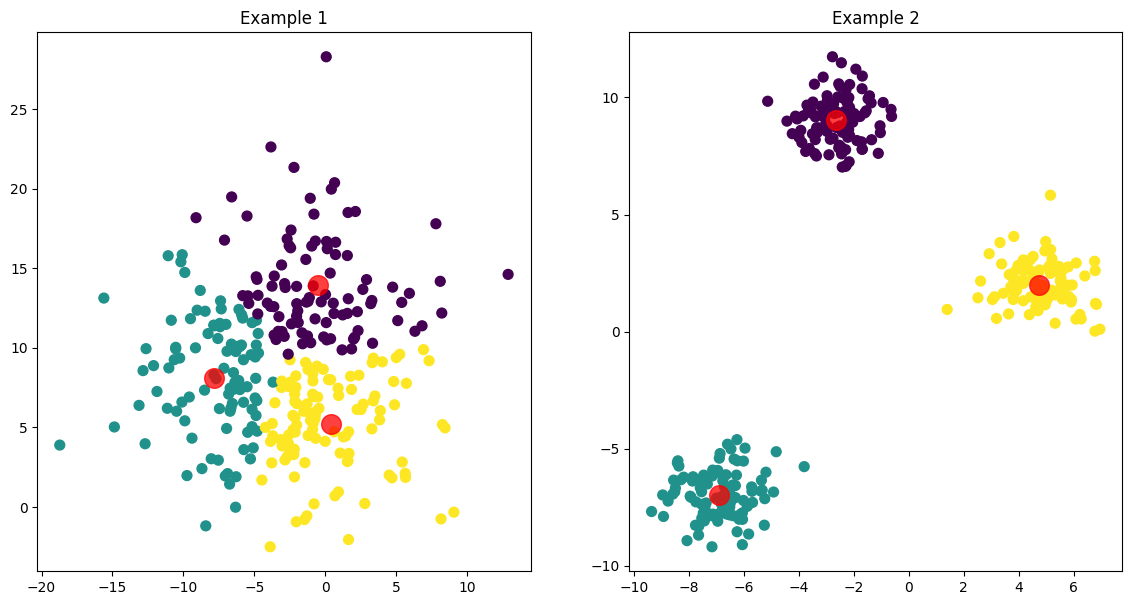

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


# Generate random data with little separation
X_random, _ = make_blobs(n_samples=300, centers=1, cluster_std=5.0, random_state=42)

# Generate data with clear clusters
X_clusters, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Function to plot the clusters side by side

_, axs = plt.subplots(1, 2, figsize=(14, 7))

kmeans1 = KMeans(n_clusters=3, random_state=42)
y_kmeans1 = kmeans1.fit_predict(X_random)
axs[0].scatter(X_random[:, 0], X_random[:, 1], c=y_kmeans1, s=50, cmap='viridis')
centers1 = kmeans1.cluster_centers_
axs[0].scatter(centers1[:, 0], centers1[:, 1], c='red', s=200, alpha=0.75)
axs[0].set_title("Example 1")

kmeans2 = KMeans(n_clusters=3, random_state=42)
y_kmeans2 = kmeans2.fit_predict(X_clusters)
axs[1].scatter(X_clusters[:, 0], X_clusters[:, 1], c=y_kmeans2, s=50, cmap='viridis')
centers2 = kmeans2.cluster_centers_
axs[1].scatter(centers2[:, 0], centers2[:, 1], c='red', s=200, alpha=0.75)
axs[1].set_title("Example 2")


While the visual approach in the example above was fairly straightforward to evaluate, consider the following: What if the data set had more than three dimensions so that it was no longer possible to visualize? Recall too that what seems like incoherent set of clusters in 2 or 3D may in fact represent coherent cluster in higher dimensionality. 

Therefore, it would help if we had a dimensionless metric that could evaluate the quality of our clustering.

This is where the **silhouette score** comes in. The silhouette score is an indicative measure of the cohesion and separation of the clustering algorithm. 

Roughly speaking, the silhouette score is the average of the silhouette coefficient for each sample (data point). The silhouette coefficient for a sample is `(b - a) / max(a, b)`, where `a` is the average distance between a sample and all other points in the same cluster, and `b` is the average distance between a sample and all other points in the next nearest cluster. The silhouette score is calculated as the mean of the silhouette coefficient for all samples.

The silhouette coefficient ranges from -1 to 1:
- A value close to 1 indicates that the sample is well matched to its own cluster and poorly matched to neighboring clusters.
- A value close to 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- A value close to -1 indicates that the sample might have been assigned to the wrong cluster.

The silhouette score for the entire clustering is the mean of the silhouette coefficients for all samples (itself a value between -1 and 1). This score provides an overall measure of how appropriately the data has been clustered.

#### Recall

Notice as well the common theme we've had ever since we touched on supervised learning and regression analysis: we evaluate models by looking at distances between points and between the model evaluation whether that model evaluates to a regression or centroids in an n-dimensional space. This idea of looking at distances and transformation in n-dimensional space is a common theme in machine learning. The key differences involve how we encode our data into a multidimensional space, and how we evaluate the effectiveness of our model in that space.

***




### Calculating the Silhouette Score

To calculate the silhouette score, we can use the `silhouette_score` function from the `sklearn.metrics` module. This function takes two arguments: the data and the labels assigned by our model. It then returns the silhouette score of our model. That is, the mean of the silhouette coefficients for all samples. Below is an example, using one of the synthetic models we generated earlier:


In [2]:
from sklearn.metrics import silhouette_score

predicted = kmeans2.labels_
data = X_clusters

silhouette_score(data, predicted)


0.8480303059596955

#### Task: calculate sillhouette score

Calculate a silhouette score for each of the models you generated. Write a single line interpreting the score.

> Answer here